# Comm 461 Assignment 1


** SUBMITTED BY: **

*ENTER TEAM NAMES HERE!!!*

## Instructions
In the problems below, modify and enter Python 3 code in the code cells as required by the questions. Also, when prompted, provide your written answers in the markdown cells marked as 

*Your answer goes here*

The code you enter is expected to run under default Anacoda package configuration for Python 3 unless stated otherwise. 

---
The code cell below imports several standard packages used in the assignment and performs setup for plots.

In [40]:
# We use numpy for random number generation and data handling
import numpy as np

# We matplotlib package for plotting 
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
# Parameters for figures
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# We use functionality of Scikit-Learn for fitting linear models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# A function for plotting RMSE fit for training and testing set over varying training set size
def plot_RMSE_fit(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="test")
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)              

## Problem 1: Model Complexity and Regularization
In this problem, we explore a tradeoff between model complexity and its ability to generalize to new data. We use artificially generated data to verify that the tested modelling approaches perform correctly.

The code cell below produces the dataset, fits a straight line model to it and prints the coefficients. **Uncomment the appropriate lines to see the result.**

In [41]:
# The seed controls the dataset that is going to be produced
np.random.seed(11)
# Number of rows
m = 100
# X is the input variable vector (feature)
X = 20 * np.random.rand(m, 1) - 10
# Label is a numerical value linked to X by a polynomial expression subject to a normal random error
y = 0.013 * X**3 - 1.1 * X + 10 + 3 * np.random.randn(m, 1)

# Create a Linear Regression model object
lin_reg = LinearRegression()
# Fit the model
lin_reg.fit(X, y)
# Print the coefficients
print(lin_reg.intercept_, lin_reg.coef_)

[9.7815954] [[-0.31493234]]


In [42]:
### Question (a)
**What are the estimated coefficient values? Has the straight line model recovered the coefficient values assumed when we generated the data? Should we expect the straight line model to be able to recover them? Why or why not?** 

Enter your answer in the markdown cell below:

---

SyntaxError: invalid syntax (<ipython-input-42-fd61df63c1b8>, line 2)

Intercept: 9.7815954 Coefficient: -0.31493234
No because the generated data is based off a 3rd degree function.

---

The code block below provides a visual examination of the original data and the model on the new data. Uncomment appropriate lines to see the result.

(-10.0, 10.0, -5.0, 25.0)

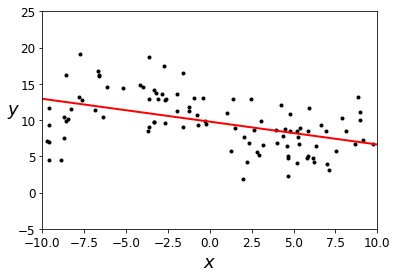

In [43]:
# Construct the x new values to evaluate predicitons on
X_new = np.linspace(-10, 10, 100).reshape(100, 1)

# Evaluate model predictions on new data
y_new = lin_reg.predict(X_new)

# Plot the original data
plt.plot(X, y, "k.")
# Plot predicted values
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
# Add axis labels 
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-10, 10, -5, 25])


### Question (b)
** What ideas does the plot above provide for improving the model? Explain. (Hint: Think about the underlying distribution of the data and what we try to fit to recover that pattern) **

Enter your answer in the markdown cell below:

---

The distribution of the data indicates that a third degree polynomial function might be a better fit.

---

The code block below uses linear regression with polynomial features up to a given degree to construct more complex models of the form $y=a_0+a_1 x + a_2 x^2 + \ldots +a_p x^p$ where $p$ is the degree in the polynomial and $a_0, a_1, \ldots, a_p$ are model parameters (coefficients of the polynomial). The constant term $a_0$ will have to be accessed separately (as `intercept_` attribute of the model object) from the rest of the coefficients (that are accessed as `coef_` attribute of the model object). Uncomments the appropriate lines to see the result.

[10.51724184] [[-0.33270294 -0.02288147]]
[9.91505466] [[-9.81831122e-01  4.51026485e-02  8.45096147e-03 -6.52894840e-04
   3.52689692e-05]]
[10.03859896] [[-1.70138396e+00  5.08004789e-02  1.27786128e-01 -5.61917181e-03
  -4.95199058e-03  2.09514384e-04  7.52048370e-05 -2.84773182e-06
  -3.72474736e-07  1.23463872e-08]]


(-10.0, 10.0, -5.0, 25.0)

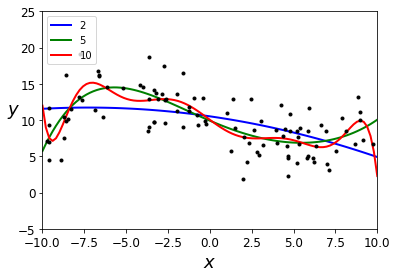

In [44]:
# The loop below iterates over the highest degree used in the model and the corresponding line style in the plot 
for style, degree in (("b-", 2), ("g-", 5), ("r-", 10)):
    # Construct modelling pipeline
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", poly_features),
            ("lin_reg", lin_reg),
        ])
    # Fit the model using the constructed pipeline
    polynomial_regression.fit(X, y)
    # Print the intercept and model coefficients
    print(polynomial_regression.named_steps["lin_reg"].intercept_, polynomial_regression.named_steps["lin_reg"].coef_)
    # Get predictions on new data
    y_new_poly = polynomial_regression.predict(X_new)
    # Plot the predicitons
    plt.plot(X_new, y_new_poly, style, label=str(degree), linewidth=2)

# Plot the original data
plt.plot(X, y, "k.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-10, 10, -5, 25])


### Question (c)
** Based on the plots, comment on performance of each model. Do some of the models manifest under-fitting or over-fitting? Can this be expected given what you know about the data and each model? Explain. **

Enter your answer in the markdown cell below:

---

The model depicted by the blue line shows underfitting. The model depicted by the red line shows overfitting. The model depicted by the green line shows neither underfitting or overfitting.
We can expect this because of the number of features in each model.

---
### Question (d)
**In the code block below, implement the model with the highest degree that, in your opinion would result in the best fit. Print the coeffificients of this model and plot it together with the original training data.**

[9.91505466] [[-9.81831122e-01  4.51026485e-02  8.45096147e-03 -6.52894840e-04
   3.52689692e-05]]


(-10.0, 10.0, -5.0, 25.0)

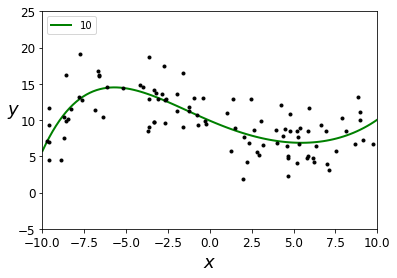

In [54]:
# Construct modelling pipeline
poly_features = PolynomialFeatures(degree=5, include_bias=False)
lin_reg = LinearRegression()
polynomial_regression = Pipeline([
        ("poly_features", poly_features),
        ("lin_reg", lin_reg),
    ])
# Fit the model using the constructed pipeline
polynomial_regression.fit(X, y)
# Print the intercept and model coefficients
print(polynomial_regression.named_steps["lin_reg"].intercept_, polynomial_regression.named_steps["lin_reg"].coef_)
# Get predictions on new data
y_new_poly = polynomial_regression.predict(X_new)
# Plot the predicitons
plt.plot(X_new, y_new_poly, "g-", label=str(degree), linewidth=2)

# Plot the original data
plt.plot(X, y, "k.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-10, 10, -5, 25])

---

In the code blocks below we use function plot_RMSE_fit (defined above) to split the data into training and testing sets, train a model on the training set of variable size and plot the error measure (root mean-square error or RMSE) against the training set size. 

We first do it for a straight-line model: *Uncomment the required lines to implement it*

(0.0, 80.0, 0.0, 6.0)

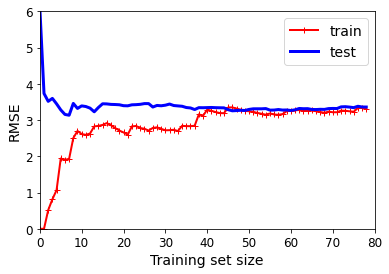

In [14]:
lin_reg = LinearRegression()

plot_RMSE_fit(lin_reg, X, y)
plt.axis([0, 80, 0, 6])  

And then for a polynomial model of degree 10:

(0.0, 80.0, 0.0, 6.0)

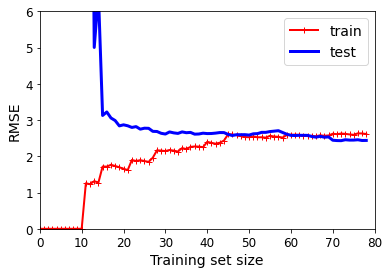

In [15]:
polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_RMSE_fit(polynomial_regression, X, y)
plt.axis([0, 80, 0, 6])

### Question (e)
** What is the name of the blue curve in the plots presented above? What do these curves tell you about the generalization performance of each model as the amount of training data changes? When does each model perform better? Explain. **

Enter your answer in the markdown cell below:

---

The blue curve is the holdout. 
Both indicate a sweet spot of around 40 for the training set size
The first model performs much better with very limited training data (less than 15) and the second model performs better when the training set size is greater than 30.

---

Ridge and Lasso regression methods permit automated selection of the model complexity. In particular, LassoCV modelling object below finds optimal model for each alpha and selects optimal alpha by testing the model in a cross-validation approach. The object requires a pre-computed table of all features. In this case, we use polynomial features up to degree 10. Uncomment appropriate lines in the code block below.

In [6]:
# Define transformation pipeline
poly_scaler = Pipeline([
       ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
       ("std_scaler", StandardScaler()),
   ])

# Generate the matrix of scaled polynomial features
X_poly = poly_scaler.fit_transform(X)

# Fit the model by cross-validation
modelCV = LassoCV(cv = 5).fit(X_poly, y.ravel())

# Print intercept, model coefficients, and optimal alpha
print(modelCV.intercept_)
print(modelCV.coef_)
print(modelCV.alpha_)

9.742837604873653
[-3.9912532   0.          0.         -0.          2.65630886 -0.
  0.         -0.          0.         -0.45919843]
0.07716571064907495


/Users/zaaisvanzyl/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.45411668045096576, tolerance: 0.1221451884087373
  model = cd_fast.enet_coordinate_descent_gram(
/Users/zaaisvanzyl/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.8073149329055695, tolerance: 0.1221451884087373
  model = cd_fast.enet_coordinate_descent_gram(
/Users/zaaisvanzyl/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.7494331197181054, tolerance: 0.1221451884087373
  model = cd_fast.enet_coordinate_descent_gram(
/Users/zaaisvanzyl/opt/anaconda3/

### Question (f)
** Comment on the model. Has Lasso excluded any features from the model?**

Enter your answer in the markdown cell below:

---

Yes, features have been excluded from the model. These are indicated by the 0 coefficients.

---

LassoCV output also permits visualization of the RMSE values for each fold (and the average RMSE over the folds). Uncomment appropriate lines in the code block below to see this plot.

(-0.4010607237643669, 2.898939276235633, 2.340375905481935, 4.39382062457263)

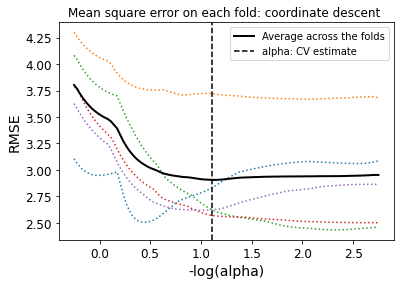

In [7]:
# Display results
m_log_alphas = -np.log10(modelCV.alphas_)

plt.plot(m_log_alphas, np.sqrt(modelCV.mse_path_), ':')
plt.plot(m_log_alphas, np.sqrt(modelCV.mse_path_.mean(axis=1)), 'k',
        label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(modelCV.alpha_), linestyle='--', color='k',
           label='alpha: CV estimate')

plt.legend()
plt.xlabel('-log(alpha)')
plt.ylabel('RMSE')
plt.title('Mean square error on each fold: coordinate descent ')
plt.axis('tight')

### Question (g)
** What is this type of graph called? What is the best RMSE value seen in this plot and what does it represent? **

Enter your answer in the markdown cell below:

---

This is a regularization path plot.
The best RMSE value seen is at -log(alpha) of 1.1. This represents the optimal penalization factor.

---

Lastly, we plot of the LassoCV model along with the original data. Uncomment appropriate lines below to see the plot.

(-10.0, 10.0, -5.0, 25.0)

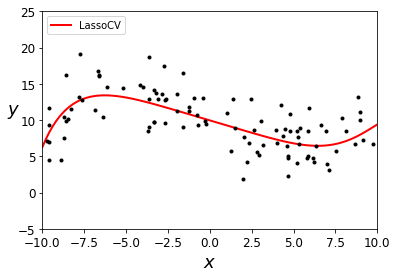

In [19]:
# Need to transform new instances appropriately
X_poly_new = poly_scaler.fit_transform(X_new)

# Compute predictions on the new instances
yCV_new = modelCV.predict(X_poly_new)

# Plot new predictions
plt.plot(X_new, yCV_new, "r-", linewidth=2, label = "LassoCV")

# Plot the original data
plt.plot(X, y, "k.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-10, 10, -5, 25])

### Question (h)
** Comment on the apparent fit of this model compared to the best model you constructed in Question (d) **

Enter your answer in the markdown cell below:

---

The fit of this model is more accurate than the model constructed in Question D. This is because the Ridge and Lasso model optimizes the number of features. This model will also have a higher generalization factor because it has been cross fold tested.

---

## Problem 2: Comparison of Tree Classifier and Logistic Regression 

For this problem, we will use a standard Breast Cancer dataset from Scikit Learn library.

In [55]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

breast_cancer = load_breast_cancer()
# DESCR attribute of the dataset provides a high-level description of the data:
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

Extract feature vectors and target; split into training and testing. ** Uncomment appropriate lines below. **

In [56]:
X_BC = breast_cancer.data
y_BC = breast_cancer.target

# Set randomness so that we all get the same answer
np.random.seed(841)

# Split the data into train and test pieces for both X and Y
X_train, X_test, y_train, y_test = train_test_split(X_BC, y_BC, train_size=0.80)

Fit the Decision Tree classifier with the maximum deapth of 2 and compute model performence on training and testing. **Uncomment appropriate lines below to see the result.**

In [57]:
tree_clf2 = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf2.fit(X_train, y_train)

print ( "Accuracy on training = %.4f" % metrics.accuracy_score(tree_clf2.predict(X_train), y_train) )
print ( "Accuracy on test = %.4f" % metrics.accuracy_score(tree_clf2.predict(X_test), y_test) )

Accuracy on training = 0.9604
Accuracy on test = 0.9123


### Question (a)
** In the code block below, fit a Decision Tree classifier with the maximum depth of 3.**

In [14]:
tree_clf3 = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf3.fit(X_train, y_train)

print ( "Accuracy on training = %.4f" % metrics.accuracy_score(tree_clf3.predict(X_train), y_train) )
print ( "Accuracy on test = %.4f" % metrics.accuracy_score(tree_clf3.predict(X_test), y_test) )

Accuracy on training = 0.9780
Accuracy on test = 0.9211


** Comment on the performance of the two decision tree models. Is there evidence of over-fitting? Has the over-fitting problem become worse from increasing the maximum depth of decision tree? Why or why not (explain)? **

---

The second model performed better in both the training and test data sets. There is evidence of overfitting because the training accuracy is higher than the test accuracy. In the first model, the difference between the two was 0.0481. In the second model the difference was 0.0569. This indicates that the overfitting problem did get worse from increasing the maximum depth of decision tree.

This occurs because adding depth (more splits) causes the tree to increasingly model the training set (and eventually perfectly model it). Eventually each parameter will occupy a single node.

---
### Question (b)
** In the code block below, create a Logistic Regression model and compute its performance on the training and testing. The code for creation of the Logistic Regression model is:**

`log_reg = LogisticRegression(random_state=42)`

`log_reg.fit(X_train, y_train)`

In [58]:
log_reg = LogisticRegression(random_state=42)

log_reg.fit(X_train, y_train)

print ( "Accuracy on training = %.4f" % metrics.accuracy_score(log_reg.predict(X_train), y_train) )
print ( "Accuracy on test = %.4f" % metrics.accuracy_score(log_reg.predict(X_test), y_test) )

Accuracy on training = 0.9495
Accuracy on test = 0.9386


/Users/zaaisvanzyl/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


---
** In the code block below, we compute the cross-validation performance for each maximum Tree depth from 1 to 20. Uncomment appropriate lines in the code to see the results. **

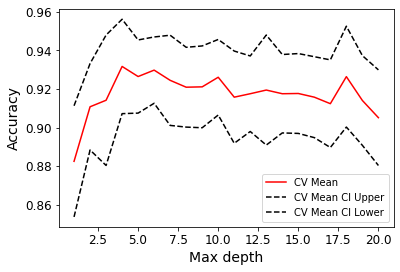

In [59]:
# Lists to store results
accuracies_CV_mean = []
accuracies_CV_std = []

# Depth values
depths = range(1, 21)

# Loop over depth values
for md in depths:
   model_DT = DecisionTreeClassifier(max_depth = md)    
   scores = cross_val_score(model_DT, X_BC, y_BC, cv = 20)
   accuracies_CV_mean.append(np.mean(scores))
   accuracies_CV_std.append(np.std(scores))

# Plot the Mean and Mean+/-Std
plt.plot(depths, accuracies_CV_mean, "r-", label="CV Mean")
plt.plot(depths, np.array(accuracies_CV_mean) + 2.093 * np.array(accuracies_CV_std) / np.sqrt(20), "k--", label="CV Mean CI Upper")
plt.plot(depths, np.array(accuracies_CV_mean) - 2.093 * np.array(accuracies_CV_std) / np.sqrt(20), "k--", label="CV Mean CI Lower")
plt.xlabel("Max depth")
plt.ylabel("Accuracy")
plt.legend()


### Question (c)
** What is this type of graph called? What is represented by the accuracy values in this plot? What maximum depth would you select based on this plot and why?**

Enter your answer in the markdown cell below:

---

This graph is a fitting graph for tree induction with the model accuracy on the y-axis and the maximum depth on the x-axis. The accuracy values are the performance of the decision tree at every level of depth. I would select a depth of 6 because it has the most favourable balance between accuracy and complexity. After this point, there seems to be diminishing accuracy. 

---
### Question (d)
** Implement cross-validation accuracy assessment for the logistic regression model in the code block below. (NOTE: Do not need to vary model complexity.)**

In [36]:
model_LR = LogisticRegression(random_state=i)
scores_log_reg = cross_val_score(log_reg, X_train, y_train, cv = 10)
CV_mean_log_reg = np.mean(scores_log_reg)
CV_std_log_reg = np.std(scores_log_reg)
print('Cross-Validation Accuracy Mean', CV_mean_log_reg)
print('Cross-Validation Accuracy STD', CV_std_log_reg)


Cross-Validation Accuracy Mean 0.9381642512077295
Cross-Validation Accuracy STD 0.040853116229365834


/Users/zaaisvanzyl/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/zaaisvanzyl/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

** Compare the logistic regression accuracy to that of your best Decision Tree model. Would you prefer a Decision Tree model or a Logistic Regression model? Consider and discuss accuracy, usability, and interpretability for potential stakeholders. **

---

The logistic regression accuracy is generally higher than that of the decision tree model. However, when the decision tree has a depth of 5-6, the accuracies are comparable. However, I would prefer a decision tree model. This is because decision trees allow for must better usability. Decision trees give much more insight as too the reasoning behind a classification. You can follow a decision tree's logic to understand the prediction. This is not possible with a logistic regression model. Decision trees allow for much easier communication with stakeholders. For example, if someone is applying for a loan and they get denied because of some parameter x, a decision tree could identify the parameter. A logistic regression would deny the applicant without giving any logical reason.